1. Install Required Libraries

In [ ]:

!pip install transformers torch pillow requests matplotlib -q


: 

2. Import Libraries

In [2]:

import torch
from PIL import Image
import requests
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt
from transformers import BlipProcessor, BlipForConditionalGeneration

print("Libraries successfully imported.")


Libraries successfully imported.


 3. Set Up Image Caption Generator Class

In [3]:
class ImageCaptionGenerator:
    def __init__(self, model_name='Salesforce/blip-image-captioning-large'):
        self.processor = BlipProcessor.from_pretrained(model_name)
        self.model = BlipForConditionalGeneration.from_pretrained(model_name)
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model.to(self.device)
        print(f"Model loaded on {self.device}")

    def load_image(self, image_path):
        try:
            if image_path.startswith(('http://', 'https://')):
                response = requests.get(image_path, stream=True)
                response.raise_for_status()
                image = Image.open(response.raw).convert('RGB')
            else:
                image = Image.open(image_path).convert('RGB')
            return image
        except Exception as e:
            print(f"Error loading image: {e}")
            return None

    def generate_caption(self, image, max_length=30):
        if image is None:
            return "Image could not be loaded."
        try:
            inputs = self.processor(image, return_tensors="pt").to(self.device)
            output = self.model.generate(**inputs, max_length=max_length)
            return self.processor.decode(output[0], skip_special_tokens=True)
        except Exception as e:
            print(f"Error generating caption: {e}")
            return "Caption generation failed."

    def batch_caption_generation(self, image_list):
        captions = {}
        for path in image_list:
            image = self.load_image(path)
            caption = self.generate_caption(image)
            captions[path] = caption
        return captions

    def visualize_captions(self, image_list):
        images, captions, paths = [], [], []
        for path in image_list:
            image = self.load_image(path)
            if image:
                caption = self.generate_caption(image)
                images.append(image)
                captions.append(caption)
                paths.append(path)

        n = len(images)
        if n == 0:
            print("No valid images to show.")
            return

        cols = min(2, n)
        rows = (n + cols - 1) // cols
        fig = plt.figure(figsize=(14, 5 * rows))

        for i in range(n):
            ax = fig.add_subplot(rows, cols, i+1)
            ax.imshow(images[i])
            ax.set_title(f"Caption: {captions[i]}", fontsize=12)
            ax.axis('off')
        plt.tight_layout()
        plt.show()

    def evaluate_caption_quality(self, image_path, caption):
        length = len(caption.split())
        detail = "High" if length > 10 else "Medium" if length > 5 else "Low"
        return {"caption": caption, "length": length, "detail_level": detail}


 4. Generate and Display Captions for Sample Images

In [9]:
# Initialize the model
caption_generator = ImageCaptionGenerator()

# Example image URLs
sample_images = [
     'https://plus.unsplash.com/premium_photo-1694819488591-a43907d1c5cc?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D',
        'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg',
        'https://img.freepik.com/free-photo/close-up-tasty-kiwi-white-background_1112-453.jpg?semt=ais_hybrid&w=740'
]

# Generate captions
captions = caption_generator.batch_caption_generation(sample_images)

# Show results
for path, caption in captions.items():
    print(f"\nImage: {path}\nCaption: {caption}")
    evaluation = caption_generator.evaluate_caption_quality(path, caption)
    print(f"Detail: {evaluation['detail_level']}, Words: {evaluation['length']}")


Model loaded on cpu

Image: https://plus.unsplash.com/premium_photo-1694819488591-a43907d1c5cc?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D
Caption: there is a small dog sitting on a white sheet with a collar
Detail: High, Words: 13

Image: https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
Caption: there is a cat that is sitting on the ground looking at the camera
Detail: High, Words: 14

Image: https://img.freepik.com/free-photo/close-up-tasty-kiwi-white-background_1112-453.jpg?semt=ais_hybrid&w=740
Caption: there are two kiwis cut in half on a white surface
Detail: High, Words: 11


 5. Visualize Captions with Images

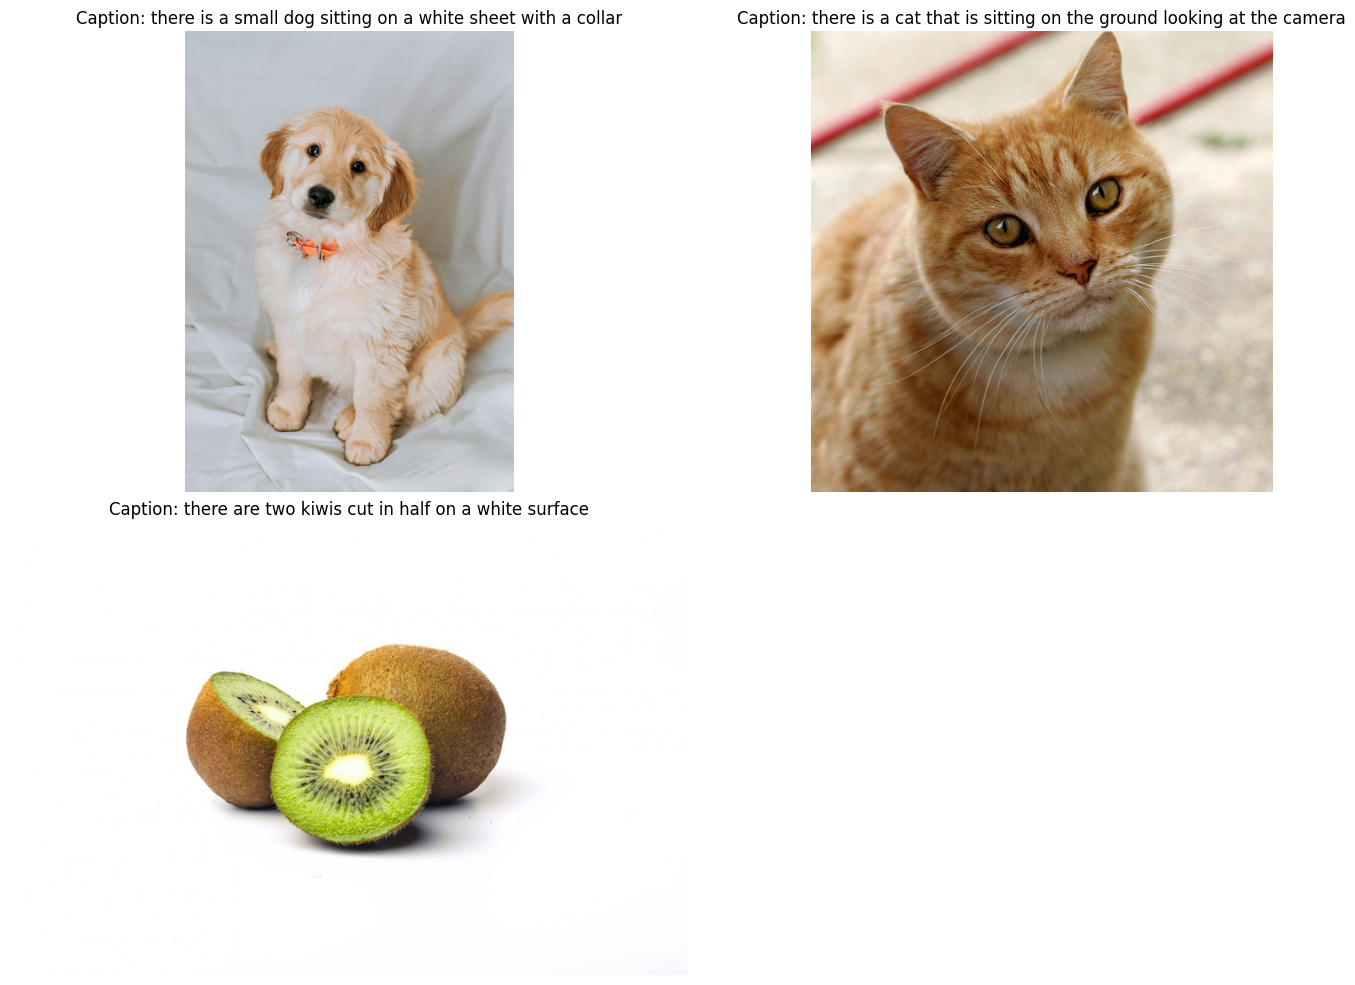

In [10]:
# Visual representation of the image + caption
caption_generator.visualize_captions(sample_images)


6. Project Insights

In [11]:
print("\nKey Highlights of this Project:\n")

insights = [
    "🔹 Model: BLIP (Bootstrapped Language-Image Pre-training)",
    "🔹 Use Case: High-quality, context-aware image captions",
    "🔹 Combines vision + language models (multimodal AI)",
    "🔹 Applications:",
    "    • Accessibility (visually impaired)",
    "    • Automated image tagging & content moderation",
    "    • Research and educational support",
    "🔹 Basic evaluation metrics (word count, detail level)"
]

for i in insights:
    print(i)



Key Highlights of this Project:

🔹 Model: BLIP (Bootstrapped Language-Image Pre-training)
🔹 Use Case: High-quality, context-aware image captions
🔹 Combines vision + language models (multimodal AI)
🔹 Applications:
    • Accessibility (visually impaired)
    • Automated image tagging & content moderation
    • Research and educational support
🔹 Basic evaluation metrics (word count, detail level)


 7. Upload and Caption Your Own Image

In [12]:
from google.colab import files

def upload_and_caption():
    uploaded = files.upload()
    caption_generator = ImageCaptionGenerator()
    for filename in uploaded.keys():
        print(f"\nUploaded: {filename}")
        image = Image.open(filename).convert('RGB')
        caption = caption_generator.generate_caption(image)
        print(f"Caption: {caption}")

        # Show image with caption
        plt.figure(figsize=(8, 6))
        plt.imshow(image)
        plt.title(f"Caption: {caption}", fontsize=14)
        plt.axis('off')
        plt.show()


To use this, run:

Saving cat.jpeg to cat.jpeg
Model loaded on cpu

Uploaded: cat.jpeg
Caption: there is a cat that is walking in the snow


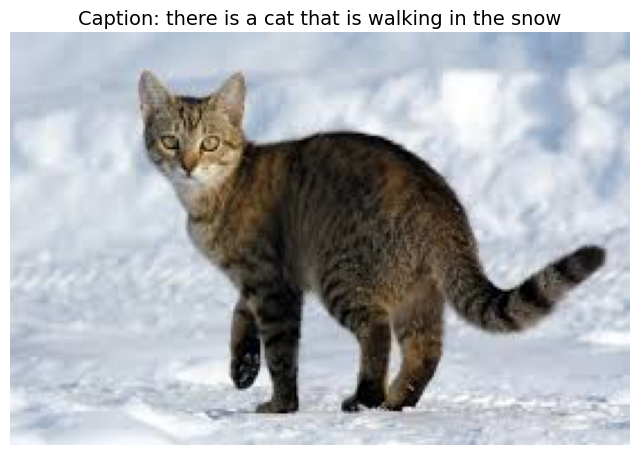

In [13]:
upload_and_caption()
